<a href="https://colab.research.google.com/github/Morilla123/Curso/blob/main/Prepros_simple%26double_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import librares

In [13]:
%%capture
!pip install opencv-python-headless=='4.1.2.30'
!pip install easyocr
!pip install imutils
!pip install torch

In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

import numpy as np                   # math library
import matplotlib.pyplot as plt      
import random                        # for generating random numbers
from google.colab.patches import cv2_imshow
import tensorflow as tf
import seaborn as sns
import cv2
import imutils

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils  
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)

## test

In [67]:
img = cv2.imread('/content/12 (2).jpg')
hight,width,_ = img.shape 
img = img[0:hight,int(width/2):width]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # es posible que esta linea no la necesitemos
img = cv2.Canny(img, 250, 250)

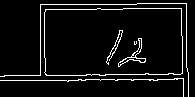

(97, 195)


In [68]:
cv2_imshow(img)
print(img.shape)

In [69]:
cnts = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for c in cnts:

    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)

    if len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
        print('Cuatro puntos')
        # print((x, y, w, h))

    elif len(approx) != 4:
        shape = "pentagon"
        print('Distinto puntos')

Cuatro puntos
Cuatro puntos
Distinto puntos


In [70]:
approx

array([[[186,   3]],

       [[ 40,   4]],

       [[ 40,  74]],

       [[  0,  76]],

       [[ 40,  75]],

       [[ 41,   4]],

       [[185,   3]],

       [[188,  96]]], dtype=int32)

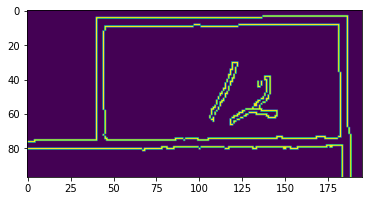

In [72]:
plt.imshow(np.asarray(img))

In [73]:
%%capture
cv2.line(img,(approx[0][0][0],approx[0][0][1]),(approx[1][0][0],approx[1][0][1]),(0,0,0),13)
cv2.line(img,(approx[1][0][0],approx[1][0][1]),(approx[2][0][0],approx[2][0][1]),(0,0,0),13)
cv2.line(img,(approx[2][0][0],approx[2][0][1]),(approx[3][0][0],approx[3][0][1]),(0,0,0),13)
cv2.line(img,(approx[3][0][0],approx[3][0][1]),(approx[0][0][0],approx[0][0][1]),(0,0,0),13)

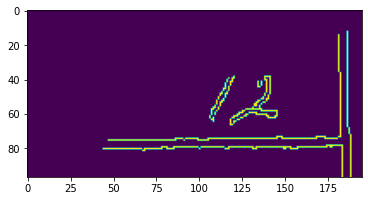

In [74]:
plt.imshow(np.asarray(img))

# test 